In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as knn

os.getcwd()

'C:\\Users\\chens\\Desktop\\OMS analytics\\ISYE6740\\HW4\\homework4'

In [38]:
# read in data
data = pd.read_csv('q3.csv',header = None)

# split original data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], data.iloc[:,-1], test_size=0.2,shuffle=False)

# navie bayes with GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
prediction = bayes.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1])
print (result)
print ("The accuracy of Naive Bayes is 100%")

[[34  0]
 [ 0  0]]
The accuracy of Naive Bayes is 100%


In [39]:
# logistic regression
logit = LR()
logit.fit(X_train, y_train)
prediction = logit.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1])
print (result)
print ("The accuracy of Logistic Regression is 85%")

[[29  5]
 [ 0  0]]
The accuracy of Logistic Regression is 85%


C:\Users\chens\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# KNN
KNN = knn()
KNN.fit(X_train, y_train)
prediction = KNN.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1])
print (result)
print ("The accuracy of KNN is 100%")

[[34  0]
 [ 0  0]]
The accuracy of KNN is 100%


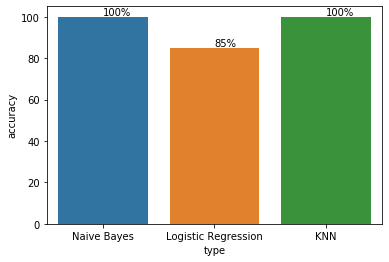

In [41]:
x=[1,2,3]
y=[100,85,100]
data = pd.DataFrame(np.array([x,y]).T)
data.rename(columns={0:"type",1:"accuracy"},inplace=True)
data["type"] = data["type"].astype('category')

p1 = sns.barplot(x="type", y="accuracy", data=data)
for index, row in data.iterrows():
    p1.text(row.type-1,row.accuracy+0.6,str(row.accuracy)+"%")
p1.set(xticklabels=['Naive Bayes','Logistic Regression', 'KNN'])
plt.show()

[[27  7]
 [ 0  0]]


C:\Users\chens\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


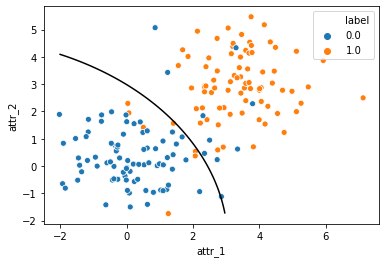

In [42]:
# read in data
data = pd.read_csv('q3.csv',header = None)
data_sub = data.iloc[:,[0,1,-1]]
data_sub.rename(columns={0:'attr_1',1:'attr_2',54:'label'},inplace =True)
# split original data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:2], data.iloc[:,-1], test_size=0.2,shuffle=False)

# navie bayes with GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
prediction = bayes.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction)
print (result)


xlim = (data_sub['attr_1'].min(), data_sub['attr_1'].max())
ylim = (data_sub['attr_2'].min(), data_sub['attr_2'].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = bayes.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x='attr_1',y='attr_2',hue='label',data=data_sub)

p1.contour(xx, yy, Z, [0.5], colors='k')

p1.set_xlabel('attr_1')
p1.set_ylabel('attr_2')

plt.show()

[[26  8]
 [ 0  0]]


C:\Users\chens\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


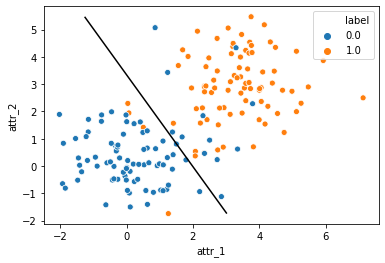

In [43]:
logit = LR()
logit.fit(X_train, y_train)
prediction = logit.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction, labels=[0,1])
print (result)


xlim = (data_sub['attr_1'].min(), data_sub['attr_1'].max())
ylim = (data_sub['attr_2'].min(), data_sub['attr_2'].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = logit.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x='attr_1',y='attr_2',hue='label',data=data_sub)

p1.contour(xx, yy, Z, [0.5], colors='k')


p1.set_xlabel('attr_1')
p1.set_ylabel('attr_2')

plt.show()

[[27  7]
 [ 0  0]]


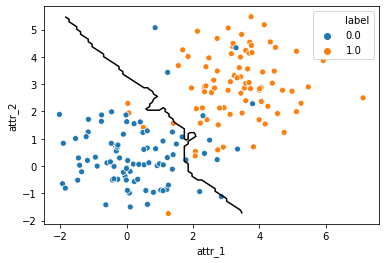

In [44]:
KNN = knn()
KNN.fit(X_train, y_train)
prediction = KNN.predict(X_test)
result = confusion_matrix(y_true=y_test, y_pred=prediction)
print (result)


xlim = (data_sub['attr_1'].min(), data_sub['attr_1'].max())
ylim = (data_sub['attr_2'].min(), data_sub['attr_2'].max())
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 80),
                     np.linspace(ylim[0], ylim[1], 80))
Z = KNN.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

p1 = sns.scatterplot(x='attr_1',y='attr_2',hue='label',data=data_sub)

p1.contour(xx, yy, Z, [0.5], colors='k')


p1.set_xlabel('attr_1')
p1.set_ylabel('attr_2')

plt.show()